In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('A2/experiments/cs_udpipe_narr_queryexp/results.csv')
df

,Unnamed: 0,0
0,LemurTF_IDF,0.351830
1,TF_IDF,0.351608
2,BM25,0.346089
3,DLH,0.345602
4,In_expC2,0.344314
5,DPH,0.342799
6,InB2,0.341692
7,In_expB2,0.340316
8,Hiemstra_LM,0.337429
9,DLH13,0.336839


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'LemurTF_IDF'),
  Text(1, 0, 'TF_IDF'),
  Text(2, 0, 'BM25'),
  Text(3, 0, 'DLH'),
  Text(4, 0, 'In_expC2'),
  Text(5, 0, 'DPH'),
  Text(6, 0, 'InB2'),
  Text(7, 0, 'In_expB2'),
  Text(8, 0, 'Hiemstra_LM'),
  Text(9, 0, 'DLH13'),
  Text(10, 0, 'DFR_BM25'),
  Text(11, 0, 'InL2'),
  Text(12, 0, 'DFReeKLIM'),
  Text(13, 0, 'Js_KLs'),
  Text(14, 0, 'DFIC'),
  Text(15, 0, 'PL2'),
  Text(16, 0, 'BB2'),
  Text(17, 0, 'DFIZ'),
  Text(18, 0, 'DFRee'),
  Text(19, 0, 'XSqrA_M'),
  Text(20, 0, 'LGD'),
  Text(21, 0, 'IFB2'),
  Text(22, 0, 'DirichletLM'),
  Text(23, 0, 'CoordinateMatch'),
  Text(24, 0, 'Tf'),
  Text(25, 0, 'Dl'),
  Text(26, 0, 'Null')])

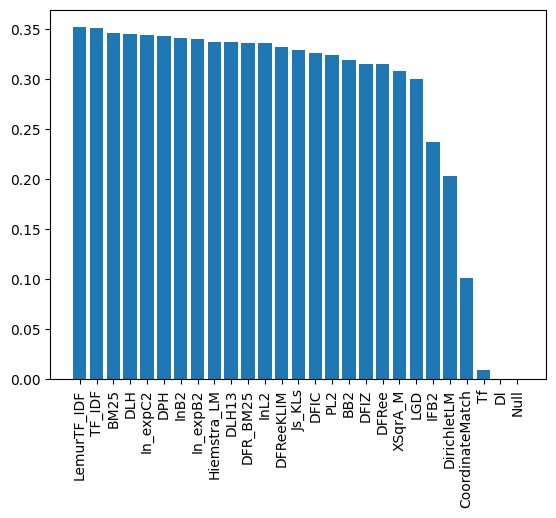

In [14]:
plt.bar(x=df['Unnamed: 0'], height=df['0'])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Averaged precision-to-recall for Czech')

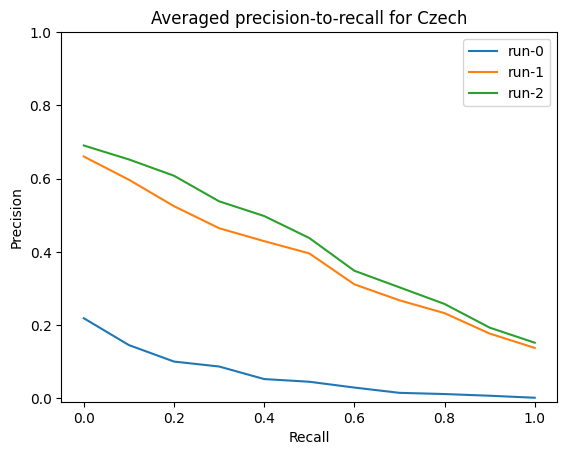

In [30]:
import subprocess

import matplotlib.pyplot as plt
import numpy as np

lang = 'cs'

def plot_prc(res, label):
    plt.plot([float(res[x]) for x in ['iprec_at_recall_0.00', 'iprec_at_recall_0.10', 'iprec_at_recall_0.20', 'iprec_at_recall_0.30', 'iprec_at_recall_0.40',
                               'iprec_at_recall_0.50', 'iprec_at_recall_0.60', 'iprec_at_recall_0.70', 'iprec_at_recall_0.80', 'iprec_at_recall_0.90',
                               'iprec_at_recall_1.00']], label=label)
    plt.ylim(top=1)
    plt.yticks()
    plt.xticks(np.arange(0, 11, 2), labels=np.linspace(0, 1, 6).round(1))

for run_id in [0, 1, 2]:
    model_file = f'run-{run_id}_train_{lang}.res'
    command = f'../../eval/trec_eval -M1000 ../../qrels-train_{lang}.txt ../../A2/{model_file}'
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    results = output.decode('ascii').split('\n')
    results = list(filter(None, map(str.split, results)))
    results = {x[0]: x[2] for x in results}
    plot_prc(results, f'run-{run_id}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Averaged precision-to-recall for Czech')

In [26]:
results

{'runid': 'run-0',
 'num_q': '25',
 'num_ret': '24372',
 'num_rel': '782',
 'num_rel_ret': '449',
 'map': '0.1337',
 'gm_map': '0.0276',
 'Rprec': '0.1668',
 'bpref': '0.1598',
 'recip_rank': '0.3327',
 'iprec_at_recall_0.00': '0.3718',
 'iprec_at_recall_0.10': '0.2837',
 'iprec_at_recall_0.20': '0.2164',
 'iprec_at_recall_0.30': '0.1950',
 'iprec_at_recall_0.40': '0.1537',
 'iprec_at_recall_0.50': '0.1299',
 'iprec_at_recall_0.60': '0.1025',
 'iprec_at_recall_0.70': '0.0815',
 'iprec_at_recall_0.80': '0.0576',
 'iprec_at_recall_0.90': '0.0249',
 'iprec_at_recall_1.00': '0.0167',
 'P_5': '0.1920',
 'P_10': '0.1760',
 'P_15': '0.1733',
 'P_20': '0.1720',
 'P_30': '0.1533',
 'P_100': '0.0924',
 'P_200': '0.0592',
 'P_500': '0.0306',
 'P_1000': '0.0180'}